In [ ]:
!pip install diffusers xformers accelerate transformers

In [ ]:
import torch
from diffusers import StableDiffusionXLPipeline, UNet2DConditionModel, LCMScheduler
from diffusers.utils import make_image_grid

Load pipeline and SDXL-DPO UNet


In [ ]:
device = "cuda"
model_id = "stabilityai/stable-diffusion-xl-base-1.0"

pipe = StableDiffusionXLPipeline.from_pretrained(
  model_id,
  unet=UNet2DConditionModel.from_pretrained(
      "mhdang/dpo-sdxl-text2image-v1", subfolder="unet", torch_dtype=torch.float16
  ),
  torch_dtype=torch.float16,
  variant="fp16",
).to(device)

pipe.enable_xformers_memory_efficient_attention()
pipe.enable_model_cpu_offload()

Load SDXL-LCM-LORA: https://huggingface.co/latent-consistency/lcm-lora-sdxl

In [ ]:
pipe.load_lora_weights("latent-consistency/lcm-lora-sdxl")
pipe.fuse_lora()
pipe.scheduler = LCMScheduler.from_pretrained(model_id, subfolder="scheduler")

Generate

  0%|          | 0/8 [00:00<?, ?it/s]

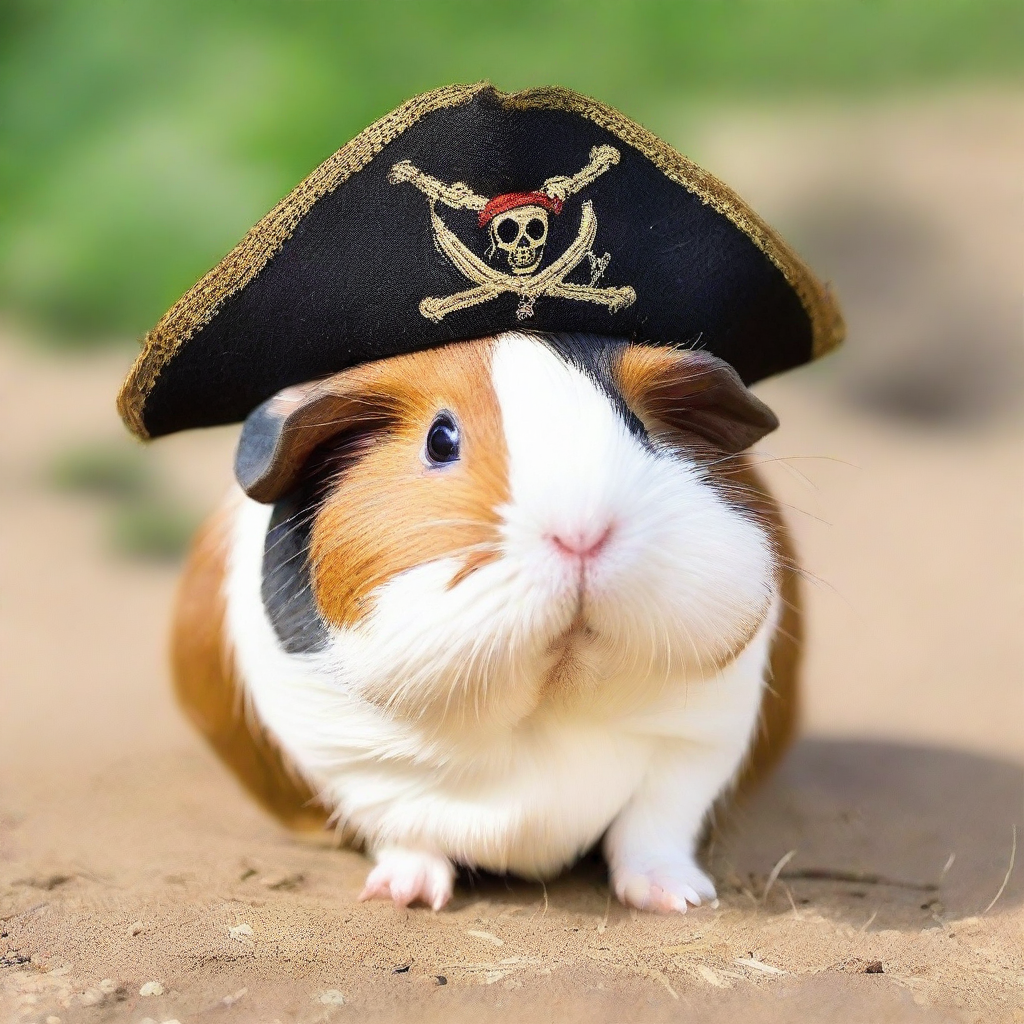

In [ ]:
prompt = "Pirate guinea pig"
images = pipe(prompt, num_inference_steps=8, guidance_scale=1).images
images[0]